# Assignment 1
# FI 8090
## Group 2: Caroline MacMillan, Chris Lee, and Jonghwa Baek

In [1]:
#Packages used throughout the Assignemnt
import pandas as pd
from yahoofinancials import YahooFinancials
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.stats import norm
from scipy import stats

## 1. Perform the following tasks (40 points)

#### a. Download the daily prices of Netflix stock from Yahoo for the Period January 2, 2001 til December 31, 2019.

In [2]:
nflx_df = yf.download('NFLX', start = '2001-01-02', end = '2019-12-31', time_interval = 'daily')

[*********************100%***********************]  1 of 1 completed


#### b. See the size and type of the downloaded data.

In [3]:
nflx_df.size #Size of the downloaded data

26592

In [4]:
type(nflx_df) #type of the downloaded data

pandas.core.frame.DataFrame

#### c. Observe the first 5 rows of the data.

In [5]:
nflx_df.head() #head shows the default first 5 rows

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


#### d. Plot the daily prices.

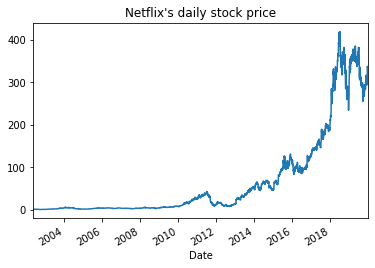

In [6]:
nflx_df['Close'].plot(title = "Netflix's daily stock price")
plt.show()

#### e. Compute log returns using closing price.

In [7]:
nflx_df_2 = yf.Ticker('NFLX').history(period = "max")
#nflx_df_2

In [8]:
nflx_log_returns = np.log(nflx_df_2['Close']/nflx_df_2['Close'].shift(1))
#nflx_log_returns = nflx_log_returns.dropna()
nflx_log_returns.head()
nflx_log_returns2 = nflx_log_returns.dropna()
nflx_log_returns2.head()

Date
2002-05-24    0.008299
2002-05-28   -0.042200
2002-05-29   -0.053110
2002-05-30   -0.027652
2002-05-31    0.009302
Name: Close, dtype: float64

#### f. Construct time plot of daily log returns of Netflix stock for the sample data.

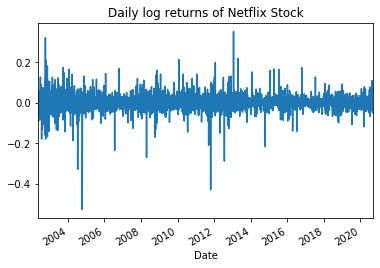

In [9]:
nflx_log_returns2.plot(title = "Daily log returns of Netflix Stock")

#### g.	Compute the sample mean, standard deviation, minimum, and maximum of the log return series.

In [10]:
nflx_df_2['nflx_daily_log_returns'] = nflx_log_returns2 #adding daily returns to the original dataframe
nflx_df_2.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,nflx_daily_log_returns
Date,,,,,,,,
2002-05-23,1.16,1.24,1.15,1.20,104790000,0,0.0,NaN
2002-05-24,1.21,1.23,1.20,1.21,11104800,0,0.0,0.008299
2002-05-28,1.21,1.23,1.16,1.16,6609400,0,0.0,-0.042200
2002-05-29,1.16,1.16,1.09,1.10,6757800,0,0.0,-0.053110
2002-05-30,1.11,1.11,1.07,1.07,10154200,0,0.0,-0.027652


In [11]:
n_sample_mean = nflx_log_returns2.mean() #individually calculating the mean/average of the daily log returns
n_sample_mean

0.001304435856936871

In [12]:
n_stdv = nflx_log_returns2.std() #indivdually calculating standard deviation of the daily log returns
n_stdv

0.0365676479976418

In [13]:
n_min = nflx_log_returns2.min() #individually calculating the minimum of the daily log returns
n_min

-0.5270203096859715

In [14]:
n_max = nflx_log_returns2.max() #individually calculating the maximum of the daily log returns
n_max

0.3523265201823223

In [15]:
nflx_log_returns2.describe() #Calculatring all the descriptive statistics at once

count    4611.000000
mean        0.001304
std         0.036568
min        -0.527020
25%        -0.014502
50%         0.000000
75%         0.017210
max         0.352327
Name: Close, dtype: float64

In [16]:
#nflx_log_returns2.dropna().describe() #Calculatring all the descriptive statistics at once with dropna *made no difference*

#### h.	Construct a histogram of the return series. 

In [17]:
nflx_returns = nflx_df_2['Close']/nflx_df_2['Close'].shift(1)-1
nflx_returns2 = nflx_returns.dropna()

In [18]:
#Histogram for daily returns

#fig = plt.figure()
#ax1 = fig.add_axes([0.1,0.1,1.0,1.0])
#nflx_returns.plot.hist(bins = 60)
#ax1.set_ylabel("Percent")
#ax1.set_title("Neflix daily returns data")
#ax1.text(-0.35,200,"Extreme Low\nreturns")
#ax1.text(0.25,200,"Extreme High\nreturns")
#plt.show()

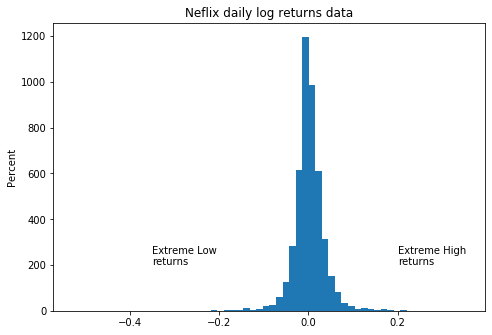

In [19]:
#Histogram of the Daily Log Returns Data

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,1.0,1.0])
nflx_log_returns2.plot.hist(bins = 60)
ax1.set_ylabel("Percent")
ax1.set_title("Neflix daily log returns data")
ax1.text(-0.35,200,"Extreme Low\nreturns")
ax1.text(0.20,200,"Extreme High\nreturns")
plt.show()

#### i.	Test whether the mean of daily log return is different from zero. 

In [20]:
stats.ttest_1samp(nflx_log_returns2, 0)

Ttest_1sampResult(statistic=2.4222739672603435, pvalue=0.015462025909783985)

#### j.	Provide a summary of the analysis.

##### Null Hypothesis (H0): mean is equal to zero. Alterantive Hypothesis (HA): mean is not equal to zero. Since p value approximately equals 0.02, which is less than 0.05, we reject the null hypothesis, concluding that the mean of daily log returns of NFLX are statistcally different than zero.

## 2. Perform the following tasks (60 points)

#### a.	Download monthly prices data of three stocks (of your choice) from Yahoo for the period January 2, 2005 till December 31, 2019. (or any 15 years of your choice: only condition is that all three stocks should be available for the entire 15 years period that you choose)

In [21]:
assets = ['LMT', 'BA', 'KO'] #The three stocks of our choice was Lockheed Martin, Boeing, and Coco-Cola
data = YahooFinancials(assets).get_historical_price_data(start_date = '2005-01-02', 
                                                         end_date = '2019-12-31', 
                                                         time_interval = 'monthly')

#### b. Choose the adjusted closing price of the three stocks. Format the price series in a single Data Series.

In [22]:
prices_df = pd.DataFrame({
    a: {x['formatted_date']: x['adjclose'] for x in data[a]['prices']} for a in assets
})

In [23]:
#prices_df

#### c. See the dimension and type of the downloaded data.

In [24]:
prices_df.shape #Dimensions of the downloaded data

(180, 3)

In [25]:
prices_df.size #Size of the downloaded data

540

In [26]:
type(prices_df) #type of the downloaded data

pandas.core.frame.DataFrame

#### d. Observe the first 5 rows of the data

In [27]:
prices_df.head()

,LMT,BA,KO
2005-01-01,36.609226,35.148350,10.373350
2005-02-01,37.502148,38.183884,10.700877
2005-03-01,38.831226,40.798790,10.418352
2005-04-01,38.761272,41.538559,11.003963
2005-05-01,41.266922,44.595333,11.305409


#### e. Plot the monthly prices of three of the stocks. Display the price series together in one plot (showing the trend together) and also separately. Label the plots correctly.

In [28]:
fig_size = plt.rcParams['figure.figsize'] #Changing the parameters of all the plots after this cell for better visualization and fitting
fig_size[0] = 15
fig_size[1] = 8
plt.rcParams['figure.figsize'] = fig_size

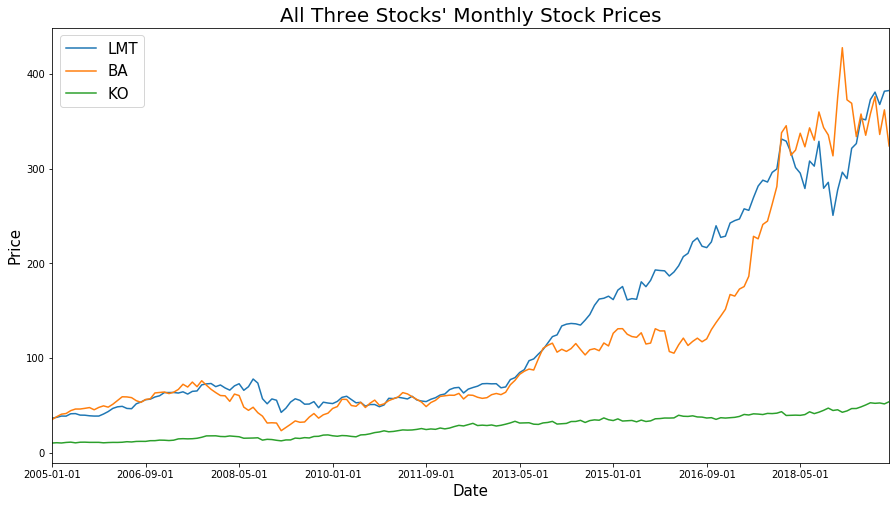

In [29]:
prices_df.plot()
plt.title('All Three Stocks\' Monthly Stock Prices', fontsize = 20)
plt.legend(loc = 'upper left', prop = {'size':15})
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

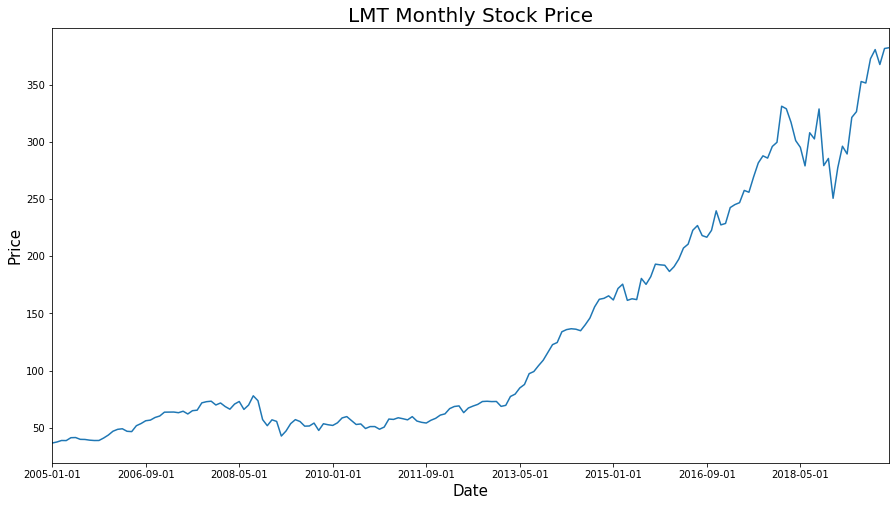

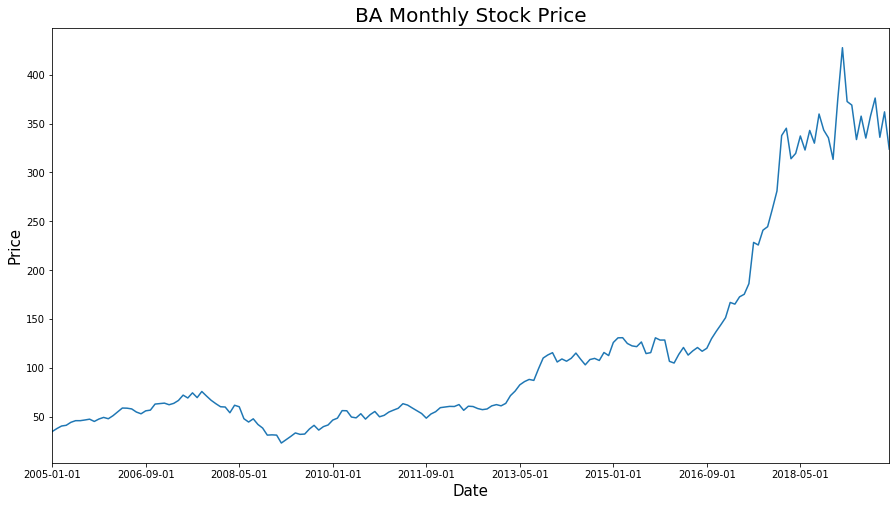

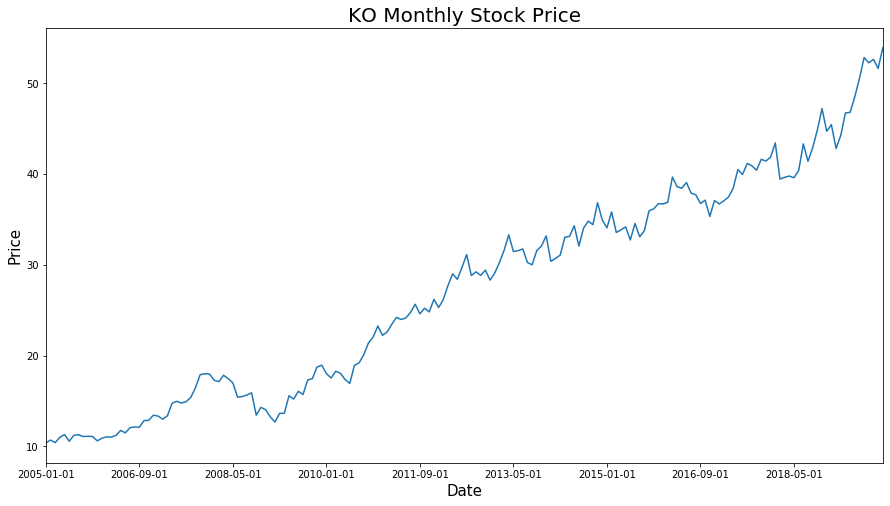

In [30]:
def indplot(stock, IndTitle): #Created a function for ease of plotting individual stocks' monthly price with plot alterations
    prices_df[stock].plot()
    plt.title(IndTitle, fontsize = 20)
    plt.xlabel('Date', fontsize = 15)
    plt.ylabel('Price', fontsize = 15)
    plt.show()
    
for a in assets: #For loop to plot all three individual stocks' plots at once
    indplot(a, a + ' Monthly Stock Price')

#### f. Compute log returns using adjusted closing price. Write the program efficiently so you can compute all the three stocks returns using functions, loops etc.

In [31]:
prices_log_returns = np.log(prices_df/prices_df.shift(1)) #Computing log returns without a for loop
prices_log_returns2 = prices_log_returns.dropna()
prices_log_returns2.head()

,LMT,BA,KO
2005-02-01,0.024098,0.082836,0.031086
2005-03-01,0.034827,0.066239,-0.026757
2005-04-01,-0.001803,0.017970,0.054687
2005-05-01,0.062640,0.071007,0.027026
2005-06-01,0.003527,0.036440,-0.066707


In [32]:
monthly_log_returns_list = [] #Computing log returns using combinations forloops, appends, and lists.
for a in assets:
        monthly_log_returns_list.append(np.log(prices_df[a]/prices_df[a].shift(1)))

assets_monthly_log_returns_df = pd.DataFrame(monthly_log_returns_list).transpose()
assets_monthly_log_returns_df2 = assets_monthly_log_returns_df.dropna()
assets_monthly_log_returns_df2.head()

,LMT,BA,KO
2005-02-01,0.024098,0.082836,0.031086
2005-03-01,0.034827,0.066239,-0.026757
2005-04-01,-0.001803,0.017970,0.054687
2005-05-01,0.062640,0.071007,0.027026
2005-06-01,0.003527,0.036440,-0.066707


#### g.	Construct time plot of monthly log returns of the three stock for the sample data. Display the return series together in one plot and also separately. Label the plots correctly.

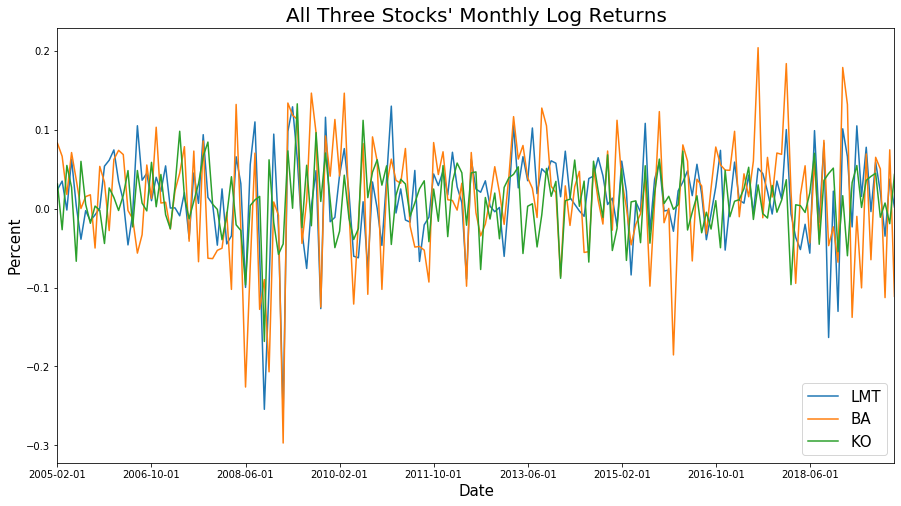

In [33]:
assets_monthly_log_returns_df2.plot()
plt.title('All Three Stocks\' Monthly Log Returns', fontsize = 20)
plt.legend(loc = 'lower right', prop = {'size':15})
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Percent', fontsize = 15)
plt.show()

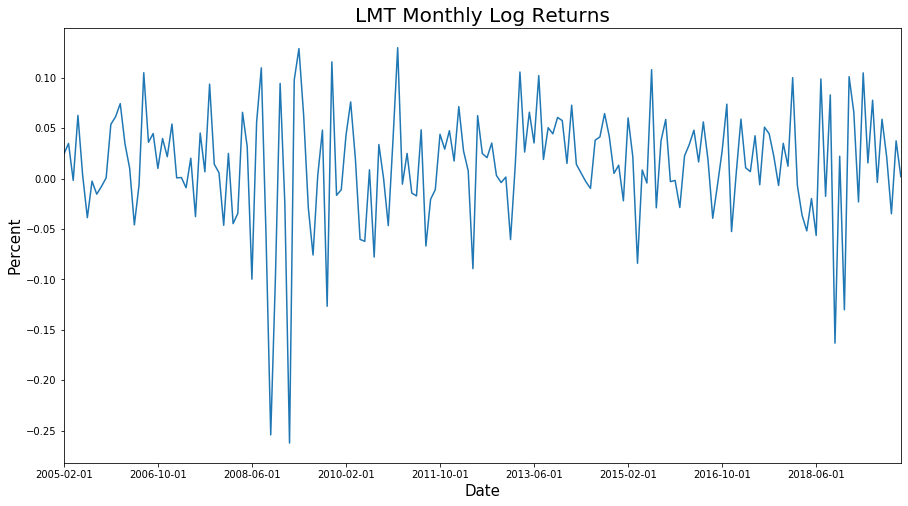

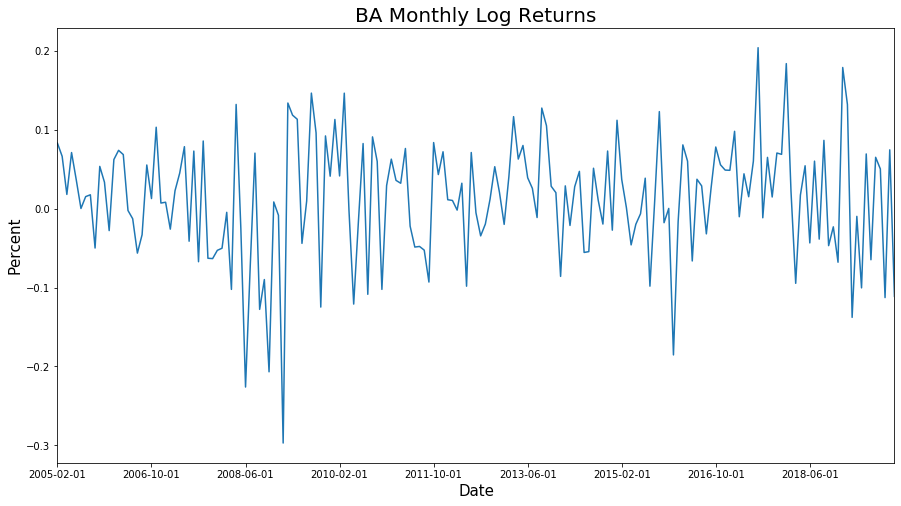

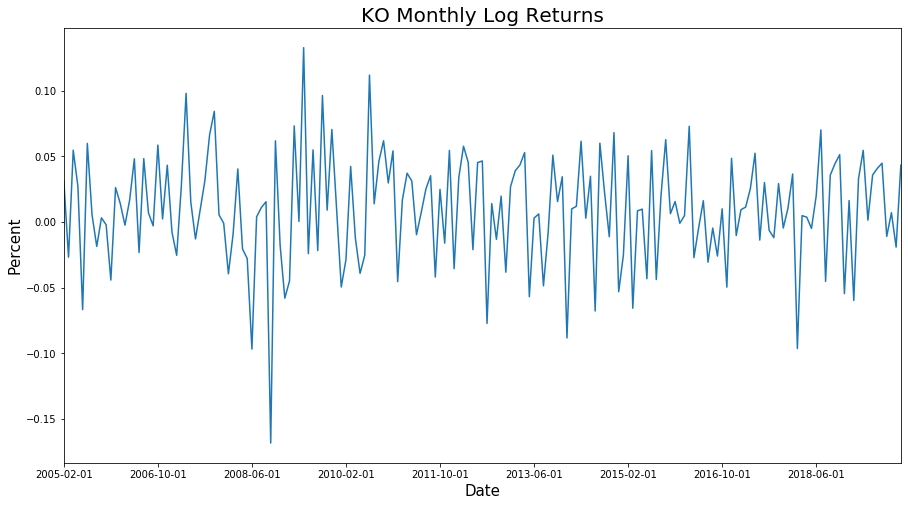

In [34]:
def indreturnplot(stock, IndTitle):  #Created a function for ease of plotting individual stocks' monthly log returns with plot alterations
    assets_monthly_log_returns_df2[stock].plot()
    plt.title(IndTitle, fontsize = 20)
    plt.xlabel('Date', fontsize = 15)
    plt.ylabel('Percent', fontsize = 15)
    plt.show()
    
for a in assets: #For loop to plot all three individual stocks' plots at once
    indreturnplot(a, a + ' Monthly Log Returns')    

#### h.	Compute the sample mean, standard deviation, minimum, and maximum of the log return series.

In [35]:
a_sample_means = assets_monthly_log_returns_df2.mean()
a_sample_means

LMT    0.013105
BA     0.012406
KO     0.009210
dtype: float64

In [36]:
a_std = assets_monthly_log_returns_df2.std()
a_std

LMT    0.058032
BA     0.076232
KO     0.042309
dtype: float64

In [37]:
a_min = assets_monthly_log_returns_df2.min()
a_min

LMT   -0.262327
BA    -0.296943
KO    -0.168248
dtype: float64

In [38]:
a_max = assets_monthly_log_returns_df2.max()
a_max

LMT    0.129805
BA     0.203833
KO     0.132718
dtype: float64

In [39]:
assets_monthly_log_returns_df2.describe()

,LMT,BA,KO
count,179.000000,179.000000,179.000000
mean,0.013105,0.012406,0.009210
std,0.058032,0.076232,0.042309
min,-0.262327,-0.296943,-0.168248
25%,-0.009439,-0.029933,-0.014906
50%,0.016432,0.017970,0.009997
75%,0.047719,0.064939,0.039685
max,0.129805,0.203833,0.132718


#### i.	Construct histograms of the three return series. 

In [40]:
prices_return = (prices_df/prices_df.shift(1))-1
prices_return2 = prices_return.dropna()

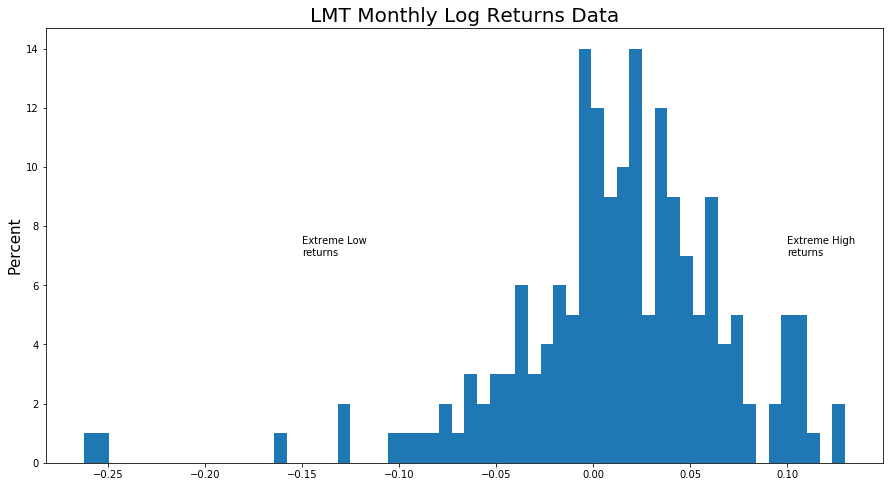

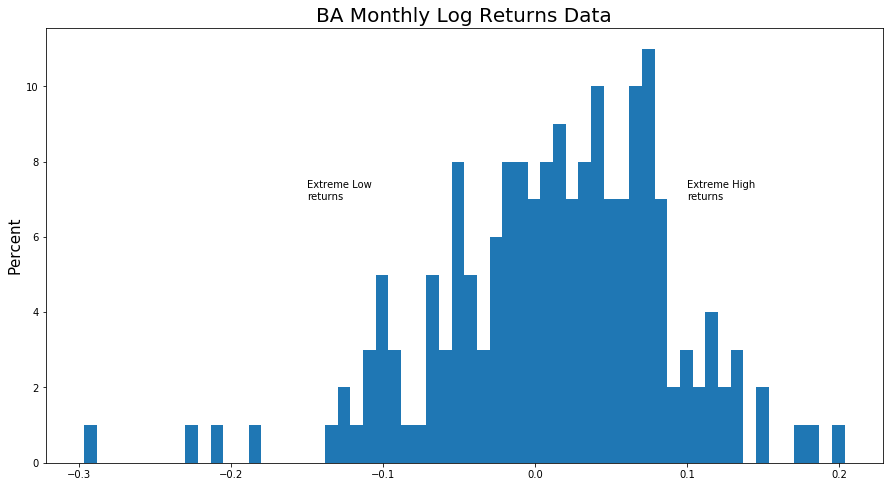

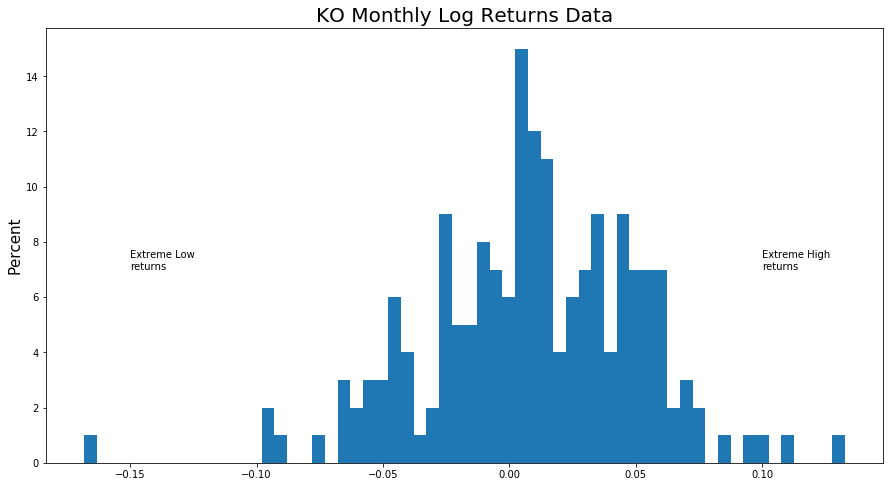

In [41]:
#Function for ease of plotting monthly returns

#def indhist(stock, indTitle): 
#    prices_return2[stock].plot.hist(bins = 60)
#    plt.ylabel("Percent", fontsize = 15)
#    plt.title(indTitle, fontsize = 20)
#    plt.text(-0.15,7,"Extreme Low\nreturns")
#    plt.text(0.10,7,"Extreme High\nreturns")
#    plt.show()

#For loop to plot all three individual stocks' plots at once

#for a in assets: 
#    indhist(a, a + ' Monthly Returns Data')

def indloghist(stock, indTitle): #Function for east of plotting monthly log returns
    assets_monthly_log_returns_df2[stock].plot.hist(bins = 60)
    plt.ylabel("Percent", fontsize = 15)
    plt.title(indTitle, fontsize = 20)
    plt.text(-0.15,7,"Extreme Low\nreturns")
    plt.text(0.10,7,"Extreme High\nreturns")
    plt.show()
    
for a in assets: #For loop to plot all three individual stocks' plots at once
    indloghist(a, a + ' Monthly Log Returns Data')

#### j.	Test whether the mean of monthly log return is different from zero.

In [42]:
for a in assets: #For loop for running the one sameple t-test on all three stocks and comparing with a mean of 0.
    test = stats.ttest_1samp(assets_monthly_log_returns_df2[a],0)
    print(a, test)

LMT Ttest_1sampResult(statistic=3.0214043132691275, pvalue=0.002886855773142854)
BA Ttest_1sampResult(statistic=2.1772987105896147, pvalue=0.030774358468591587)
KO Ttest_1sampResult(statistic=2.912398099993566, pvalue=0.004046086917839549)


#### k.	Compute the total HPR (report log returns) for the entire duration of the data (15 years period) for the three stocks. Compute the average annual HPR returns (report log returns) for the sample for all the three stocks. Report values in percentage (%)   (6 points)

In [43]:
for a in assets: #For loop for calculating the HPR for all three stocks.
    hpr = np.log(prices_df[a]['2019-12-01']/prices_df[a]['2005-01-01'])*100
    print(a, str(hpr) + '%')

LMT 234.58685966787334%
BA 222.06512486196917%
KO 164.85988094497804%


In [44]:
for a in assets: #For loop for calculating the average annual HPR returns for all three stocks.
    annual_return = (np.log(prices_df[a]['2019-12-01']/prices_df[a]['2005-01-01']) ** (1/15)-1)*100
    print(a, str(annual_return) + '%')

LMT 5.849037214830299%
BA 5.462652608167362%
KO 3.3889993728543732%


#### l.	Provide a summary of the analysis.

#### Null Hypothesis (H0): the mean is equal to zero. Alterantive hypothesis (HA): the mean is not equal to zero. Since the p-value for all three stocks are less than 0.05, we reject the null hypothesis, concluding that the mean of monthly log returns of all three stocks are statistcally different than 0.  

##### In the last 15 years, the three stocks have shown following performances in return (high to low); LMT > BA > KO, and in risks (standard deviation, low to high); KO > LMT > BA. It is reasonably assumed that LMT and BA have growth stock characteristics (High price growth, HPR > 200%) while KO represents value stocks (Low price growth, HPR < 200%).